In [1]:
import torch
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
#GPU를 이용하기 위하여 cuda를 사용
device = 'cuda'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
traing_epoch = 15
batch_size = 100

root는 파일의 위치,
train는 파일을 이용하여 훈련 여부,
trainforms은 어떤 Trainform을 적용하여 데이터를 불러올 것인지,
download는 파일이 없으면 다운로드 하도록 함,

In [4]:
mnist_train = dsets.MNIST(root='MINST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)
                         
mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)


dataset은 사용할 데이터 셋, 
batch_size은 데이터를 얼마큼 잘라서 사용 할 것인지, 
shuffle는 데이터를 섞어서 사용 할 것인지, 
drop_last는 batch_size만큼 사용하고 마지막 부분의 크기가 batch_size만큼 맞지 않을때, 
true면 사용하지않고 버림

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size = batch_size,
                                         shuffle=True,
                                         drop_last=True)

In [6]:
linear = torch.nn.Linear(784,10,bias=True).to(device)

In [7]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range (traing_epoch + 1):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X,Y in data_loader:
        X = X.view(-1,28*28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost /total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')
        

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274149
Epoch: 0003 cost = 0.331187516
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158142
Epoch: 0006 cost = 0.300180733
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800743
Epoch: 0013 cost = 0.277809024
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440825
Epoch: 0016 cost = 0.273007214
Learning finished


Accuracy: 0.8837999701499939
Label:  5
Prediction:  3


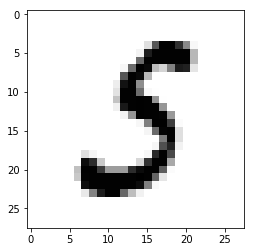

In [10]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()